In [156]:
from sympy import init_session
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display

In [142]:
init_session()

IPython console for SymPy 1.4 (Python 3.7.3-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.4/



* Sympy不仅可以帮你推导公式，还可以生成C语言代码。

In [50]:
ll = "$${}={}$$"
lll = "$${}$$"

In [16]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

# 符号计算让数学更有趣

In [117]:
s = sin(x)

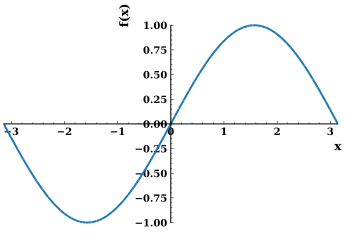

In [120]:
plot(s, (x, -pi, pi))

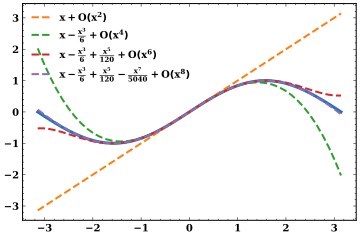

In [170]:
x0 = np.linspace(-np.pi, np.pi)
plt.plot(x0, np.sin(x0), lw=3)
for n in [2, 4, 6, 8]:
    y0 = lambdify(x, s.series(n=n).removeO())
    plt.plot(x0, y0(x0), "--", label=f"${latex(s.series(n=n))}$")

plt.legend()

In [178]:
diff(sin(x)).subs({x:0})

In [179]:
diff(sin(x)).subs({x:pi})

In [192]:
series(sin(x), x, x0=0)

In [193]:
series(sin(x), x, x0=pi)

In [198]:
diff(series(sin(x), x, n=10).removeO())

In [201]:
series(cos(x), x, n=10).removeO()

# Derivative

$$f(x) = e^{- \frac{x^{2}}{2}} \cos{\left(\pi x \right)}$$

In [11]:
x = symbols('x', real=True)
f = exp(-x**2/2)*cos(pi*x)

dfdx = f.diff(x)

In [12]:
print(ll.format("f(x)", latex(f)))

$$f(x)=e^{- \frac{x^{2}}{2}} \cos{\left(\pi x \right)}$$


In [13]:
f, dfdx

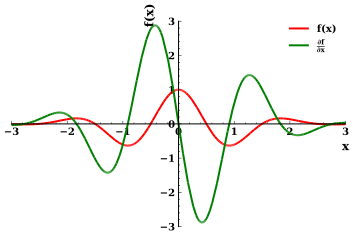

In [43]:
p = plot(f,dfdx, (x, -3,3), show=false, legend = True)
p[0].line_color="r"
p[1].line_color="g"

p[0].label = r"$f(x)$"
p[1].label = r"$\frac{\partial f}{\partial x}$"
p.show()

In [28]:
p

In [42]:
plot?

$$g(x,y)= e^{- \frac{x^{2}}{2} - \frac{y^{2}}{2}} \cos{\left(\pi x \right)} $$

In [100]:
x, y = symbols('x, y', real=True)
g = exp(-(x**2+y**2)/2)*cos(pi*x)

dgdx, dgdy = [g.diff(var) for var in [x,y]]
dgdx, dgdy

⎛        2    2                  2    2                  2    2         ⎞
⎜       x    y                  x    y                  x    y          ⎟
⎜     - ── - ──               - ── - ──               - ── - ──         ⎟
⎜       2    2                  2    2                  2    2          ⎟
⎝- x⋅ℯ         ⋅cos(π⋅x) - π⋅ℯ         ⋅sin(π⋅x), -y⋅ℯ         ⋅cos(π⋅x)⎠

In [106]:
print(ll.format("g(x,y)=", latex(g)))

$$g(x,y)==e^{- \frac{x^{2}}{2} - \frac{y^{2}}{2}} \cos{\left(\pi x \right)}$$


### 实例： 函数的导数

$$f(\theta,x,y)=h e^{- \frac{\left(y^{'}\right)^{2}}{2 t^{2}} - \frac{\left(x^{'}\right)^{2}}{2 s^{2}}} \cos{\left(\phi + \frac{2 \pi x^{'}}{l} \right)}$$
$$x^\prime=\left(- u + x\right) \cos{\left(\rho \right)} + \left(- v + y\right) \sin{\left(\rho \right)}$$
$$y^\prime=\left(u - x\right) \sin{\left(\rho \right)} + \left(- v + y\right) \cos{\left(\rho \right)}$$

In [84]:
x, y, u, v, h, s, t, l, rho, phi = symbols(
    'x, y, u, v, h, s, t, l, rho, phi', real=True)

xp_0, yp_0 = symbols('x^\', y^\'')
xp =  (x - u) * cr + (y - v) * sr
yp = -(x - u) * sr + (y - v) * cr

In [85]:
cr = cos(rho)
sr = sin(rho)
f0 = ( h * exp(-xp_0**2 / (2*s**2) - yp_0**2 / (2*t**2) ) *
      cos( 2 * pi * xp_0 / l + phi ) )

In [113]:
print(ll.format(r"f(\theta,x,y)", latex(f0)))
print(ll.format(r"x^\prime",latex(xp)))
print(ll.format(r"y^\prime",latex(yp)))

$$f(\theta,x,y)=h e^{- \frac{\left(y^{'}\right)^{2}}{2 t^{2}} - \frac{\left(x^{'}\right)^{2}}{2 s^{2}}} \cos{\left(\phi + \frac{2 \pi x^{'}}{l} \right)}$$
$$x^\prime=\left(- u + x\right) \cos{\left(\rho \right)} + \left(- v + y\right) \sin{\left(\rho \right)}$$
$$y^\prime=\left(u - x\right) \sin{\left(\rho \right)} + \left(- v + y\right) \cos{\left(\rho \right)}$$


In [87]:
f = f0.subs({xp_0:xp, yp_0:yp})

In [88]:
f

                                       2                                      
     ((u - x)⋅sin(ρ) + (-v + y)⋅cos(ρ))    ((-u + x)⋅cos(ρ) + (-v + y)⋅sin(ρ))
   - ─────────────────────────────────── - ───────────────────────────────────
                        2                                     2               
                     2⋅t                                   2⋅s                
h⋅ℯ                                                                           
                                                                              

2                                                 
                                                  
─                                                 
                                                  
     ⎛    2⋅π⋅((-u + x)⋅cos(ρ) + (-v + y)⋅sin(ρ))⎞
 ⋅cos⎜φ + ───────────────────────────────────────⎟
     ⎝                       l                   ⎠

In [65]:
theta = (u, v, h, s, t, l, rho, phi)

In [66]:
theta

(u, v, h, s, t, l, ρ, φ)

In [75]:
derivs = [ f.diff(var) for var in theta ]

In [77]:
for i, var in enumerate(theta):
    print('grad[{}]'.format(i), '=', ccode(derivs[i]) + ';')

grad[0] = h*(-((u - x)*sin(rho) + (-v + y)*cos(rho))*sin(rho)/pow(t, 2) + ((-u + x)*cos(rho) + (-v + y)*sin(rho))*cos(rho)/pow(s, 2))*exp(-1.0/2.0*pow((u - x)*sin(rho) + (-v + y)*cos(rho), 2)/pow(t, 2) - 1.0/2.0*pow((-u + x)*cos(rho) + (-v + y)*sin(rho), 2)/pow(s, 2))*cos(phi + 2*M_PI*((-u + x)*cos(rho) + (-v + y)*sin(rho))/l) + 2*M_PI*h*exp(-1.0/2.0*pow((u - x)*sin(rho) + (-v + y)*cos(rho), 2)/pow(t, 2) - 1.0/2.0*pow((-u + x)*cos(rho) + (-v + y)*sin(rho), 2)/pow(s, 2))*sin(phi + 2*M_PI*((-u + x)*cos(rho) + (-v + y)*sin(rho))/l)*cos(rho)/l;
grad[1] = h*(((u - x)*sin(rho) + (-v + y)*cos(rho))*cos(rho)/pow(t, 2) + ((-u + x)*cos(rho) + (-v + y)*sin(rho))*sin(rho)/pow(s, 2))*exp(-1.0/2.0*pow((u - x)*sin(rho) + (-v + y)*cos(rho), 2)/pow(t, 2) - 1.0/2.0*pow((-u + x)*cos(rho) + (-v + y)*sin(rho), 2)/pow(s, 2))*cos(phi + 2*M_PI*((-u + x)*cos(rho) + (-v + y)*sin(rho))/l) + 2*M_PI*h*exp(-1.0/2.0*pow((u - x)*sin(rho) + (-v + y)*cos(rho), 2)/pow(t, 2) - 1.0/2.0*pow((-u + x)*cos(rho) + (-v + y)*sin

In [70]:
variable_namer = numbered_symbols('sigma_')
replacements, reduced = cse(derivs, symbols=variable_namer)

In [74]:
for key, val in replacements:
    print('double', key, '=', ccode(val) + ';')
    
for i, r in enumerate(reduced):
    print('grad[{}]'.format(i), '=', ccode(r) + ';')

double sigma_0 = cos(rho);
double sigma_1 = 2*sigma_0;
double sigma_2 = -u + x;
double sigma_3 = sin(rho);
double sigma_4 = -v + y;
double sigma_5 = sigma_3*sigma_4;
double sigma_6 = sigma_0*sigma_2 + sigma_5;
double sigma_7 = M_PI/l;
double sigma_8 = 2*sigma_7;
double sigma_9 = phi + sigma_6*sigma_8;
double sigma_10 = pow(s, -2);
double sigma_11 = pow(sigma_6, 2);
double sigma_12 = pow(t, -2);
double sigma_13 = u - x;
double sigma_14 = sigma_0*sigma_4;
double sigma_15 = sigma_13*sigma_3 + sigma_14;
double sigma_16 = pow(sigma_15, 2);
double sigma_17 = exp(-1.0/2.0*sigma_10*sigma_11 - 1.0/2.0*sigma_12*sigma_16);
double sigma_18 = h*sigma_17*sin(sigma_9);
double sigma_19 = sigma_10*sigma_6;
double sigma_20 = sigma_12*sigma_15;
double sigma_21 = sigma_17*cos(sigma_9);
double sigma_22 = h*sigma_21;
double sigma_23 = sigma_18*sigma_8;
double sigma_24 = sigma_2*sigma_3;
grad[0] = sigma_1*sigma_18*sigma_7 + sigma_22*(sigma_0*sigma_19 - sigma_20*sigma_3);
grad[1] = sigma_22*(sigma_0*sigma_20 

# 方程组求解

$$ex-ey=2$$
$$ex+ey=0$$

In [44]:
x, y = symbols("x,y")

eq1 = Eq(E*x-E*y, 2)
eq2 = Eq(E*x+E*y, 0)

eq1,eq2

In [45]:
solve([eq1,eq2])

In [52]:
coeffs= Matrix([[E, -E], [E, E]])
const= Matrix([2, 0])
[coeffs, const]

⎡⎡ℯ  -ℯ⎤  ⎡2⎤⎤
⎢⎢     ⎥, ⎢ ⎥⎥
⎣⎣ℯ  ℯ ⎦  ⎣0⎦⎦

In [53]:
coeffs.solve(const)

⎡ -1 ⎤
⎢ℯ   ⎥
⎢    ⎥
⎢  -1⎥
⎣-ℯ  ⎦

$$2x+y=3$$
$$x-y=7$$

In [96]:
p._backend

In [101]:
sols[x]

$$
−2x + 3y − 2z = 8\\
−x + 2y − 10z = 0\\
5x − 7y + 4z = −20
$$

In [106]:
eq1= Eq(-2*x + 3*y -2*z, 8)
eq2= Eq(-x + 2*y - 10*z, 0)
eq3= Eq(5*x - 7*y + 4*z, -20)

In [112]:
M = Matrix([Poly(eq1.lhs).coeffs(), Poly(eq2.lhs).coeffs(), Poly(eq3.lhs).coeffs()])
const= Matrix([eq1.rhs, eq2.rhs, eq3.rhs])


In [115]:
M.solve(const)

⎡-3 ⎤
⎢   ⎥
⎢ 1 ⎥
⎢   ⎥
⎣1/2⎦

In [116]:
solve([eq1, eq2, eq3])

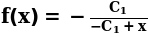

In [237]:
x = symbols("x", real=True)
f = symbols("f", cls=Function)

eq = x*f(x).diff(x)+f(x)-f(x)**2
dsolve(eq, f(x))

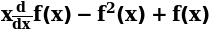

In [238]:
eq

In [210]:
dsolve?

# 参考

https://mzucker.github.io/2018/04/11/sympy-case-studies-part-2-derivatives.html#fn:4